## Breast Cancer Wisconsin (Diagnostic) Data Set

## About this Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [24]:
# read data as pandas data frame
data = pd.read_csv("C:/Users/Admin/Downloads/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# quick look to data
data.head()
data.shape # (569, 31)
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## histogram 

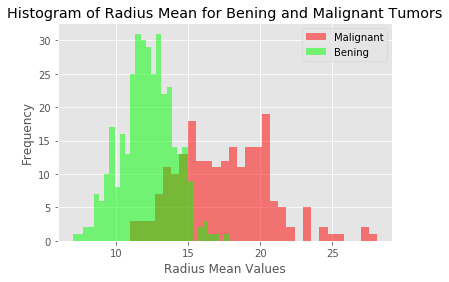

In [27]:
# there is two categories in diagnosis : Malignant =M , Bening = N
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant") # fc = color
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

## * Lets look at other conclusions
* From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
* The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)

## Box plot

In [28]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4] # 25%       11.080000
Q3 = desc[6] # 75%       13.370000
IQR = Q3-Q1 
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [29]:
desc

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

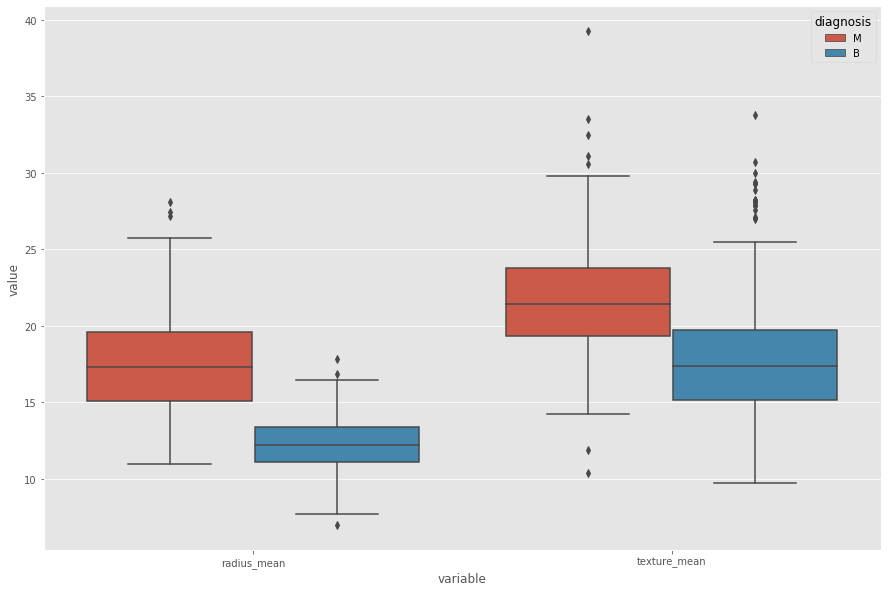

In [30]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

## mean
## variance
## standard deviation

In [31]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


## Correlation

In [ ]:
f,ax=plt.subplots(figsize = (18,18)) # set figure axis and facor
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se


In [21]:
np.cov(data.radius_mean,data.area_mean)

array([[1.24189201e+01, 1.22448341e+03],
       [1.22448341e+03, 1.23843554e+05]])

In [22]:
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


## Pearson Correlation
* Division of covariance by standart deviation of variables
* Lets look at pearson correlation between radius mean and area mean
* First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :) 
* p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
* As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
* Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
* To be more clear what we did at correlation part and pearson correlation part is same.


In [23]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566123


## Hypothesis Testing

In [18]:
#  T-test
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)
# P values is almost zero so we can reject null hypothesis.

p-value:  1.5253492492559045e-184
